Goal: Plot Q and U as a function of fourier frequency

SANDPIT TEST

In [4]:
import numpy as np
import sys
sys.path.append('/home/c2032014/py_files/')
import numpy as np
import load_and_clean as lac
import rms_normalisation as rn
from stingray import Lightcurve, Powerspectrum, AveragedCrossspectrum
import dG_span_new as dgs
import G_span as gs
import frac_rms_span as frmss
import phase_span as phs
import fit_rms_phase as frp
import F_test as ft
import frac_rms_err_span as fres
import phase_err_span as pes
import chi_square as chis
import importlib
importlib.reload(frp)
importlib.reload(ft)

<module 'F_test' from '/home/c2032014/py_files/F_test.py'>

In [27]:
file1= '/home/c2032014/CYGX1/event_1pt5/ixpe01002901_det12_evt1pt5_v01_src.fits'
file2= '/home/c2032014/CYGX1/event_1pt5/ixpe01002901_det3_evt1pt5_v01_src.fits'
Pmin=51
Pmax=200
gti='/home/c2032014/CYGX1/event_1pt5/GTI_ixpe01002901_evt1pt5_v01_src.txt'
bin_length=1/64
seg_length=16
fmin=1
fmax=2

mod_min=np.radians(-90)
mod_max=np.radians(90)
mod_bin_number=20
J=mod_bin_number
spur_sub=True
coherence_corrector=False

In [5]:
data_1,header_1,*_=lac.load_and_clean(file1,Pmin,Pmax)
data_2,header_2,*_=lac.load_and_clean(file2,Pmin,Pmax)

In [6]:
norm_factor,lc_2_ref,GTI=rn.rms_normalisation(data_1,data_2,bin_length,seg_length,fmin,fmax,gti)

In [46]:
#Convert rms norm to real and im norm

#rms norm= np.sqrt(fmax-fmin) /np.sqrt(av_power_norm_real)

#real norm = np.sqrt(av_power_norm_real) = 1/rms norm * np.sqrt(fmax-fmin)

norm_factor_real=1/norm_factor * np.sqrt(fmax-fmin)
norm_factor_im=1/norm_factor * np.sqrt(fmax-fmin)

In [7]:
ps_2_ref=Powerspectrum.from_lightcurve(lc_2_ref,seg_length,norm='frac')
ps_2_ref_mean=ps_2_ref.power[(fmin<=ps_2_ref.freq) & (ps_2_ref.freq<=fmax)].mean()


In [8]:
aspace = np.linspace(mod_min, mod_max, mod_bin_number + 1)
mod_min_array = aspace[:-1]
mod_max_array = aspace[1:]
av_mod = (mod_min_array + mod_max_array) / 2
av_mod_err = (mod_max_array - mod_min_array) / 2

In [10]:
lc_1_ref=Lightcurve.make_lightcurve(data_1['TIME'],dt=bin_length,gti=GTI)

In [11]:
cs_ref=AveragedCrossspectrum.from_lightcurve(lc_1_ref,lc_2_ref,seg_length,norm='frac')
cs_ref_real_mean=cs_ref.power.real[(fmin<=cs_ref.freq) & (cs_ref.freq<=fmax)].mean()

In [14]:
G_real_span, G_im_span, n_span, m_span,lc_1_sub_span=gs.G_span(mod_bin_number,data_1,lc_2_ref,GTI,bin_length,seg_length,fmin,fmax,spur_sub)

Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...
Subtracting spurious polarisation...


In [19]:
dG_span= dgs.dG_span(G_real_span,G_im_span,lc_1_sub_span,n_span,
                m_span,fmin,fmax,seg_length,
                ps_2_ref_mean,cs_ref_real_mean,coherence_corrector)

greoig
Applying no coherence correction...
Pr3= 0.17875639646056113
Ps12= 1.5524656625403528
mod G= 0.01571452217019171
Pco_r_123= 0.015597630278491485
dG= 0.0007275155641113826
Applying no coherence correction...
Pr3= 0.17875639646056113
Ps12= 1.534319387294054
mod G= 0.016216289618835478
Pco_r_123= 0.015597630278491485
dG= 0.0007229624983247257
Applying no coherence correction...
Pr3= 0.17875639646056113
Ps12= 1.5474093419805985
mod G= 0.015476750264698266
Pco_r_123= 0.015597630278491485
dG= 0.0007264303611950292
Applying no coherence correction...
Pr3= 0.17875639646056113
Ps12= 1.536673684392008
mod G= 0.015641328159843843
Pco_r_123= 0.015597630278491485
dG= 0.0007238025831622532
Applying no coherence correction...
Pr3= 0.17875639646056113
Ps12= 1.5345523315563152
mod G= 0.014478451704038137
Pco_r_123= 0.015597630278491485
dG= 0.0007238321387553186
Applying no coherence correction...
Pr3= 0.17875639646056113
Ps12= 1.5311034482957968
mod G= 0.01574380597319169
Pco_r_123= 0.0155976302

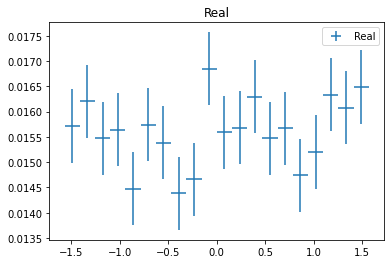

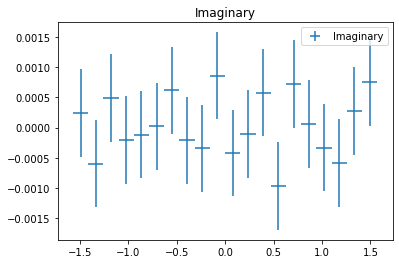

In [40]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Real')
plt.errorbar(av_mod,G_real_span,xerr=av_mod_err,yerr=dG_span,ls='None',label='Real')
plt.legend()
plt.figure()
plt.title('Imaginary')
plt.errorbar(av_mod,G_im_span,xerr=av_mod_err,yerr=dG_span,ls='None',label='Imaginary')
plt.legend()


In [32]:
def cross_spec_model_real(phi,A,B,C):
    Re_G=(1/J)*(A+B*np.cos(2*phi)+C*np.sin(2*phi))
    return Re_G

def cross_spec_model_imag(phi,B,C):
    Im_G=(1/J)*(B*np.sin(2*phi)+C*np.cos(2*phi))
    return Im_G



In [37]:
from scipy.optimize import curve_fit
parameters_real,*_=curve_fit(cross_spec_model_real,np.array(av_mod),np.array(G_real_span))
fit_real = cross_spec_model_real(np.array(av_mod),parameters_real[0],parameters_real[1],parameters_real[2])

parameters_imag,*_=curve_fit(cross_spec_model_imag,np.array(av_mod),np.array(G_im_span))
fit_imag = cross_spec_model_imag(np.array(av_mod),parameters_imag[0],parameters_imag[1])

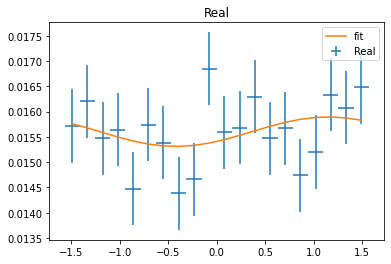

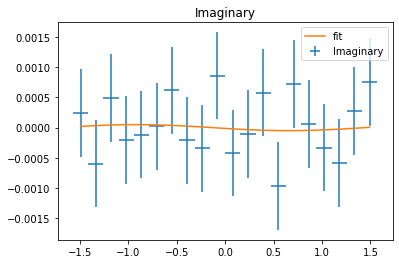

In [41]:

plt.figure()
plt.title('Real')
plt.errorbar(av_mod,G_real_span,xerr=av_mod_err,yerr=dG_span,ls='None',label='Real')
plt.plot(av_mod,fit_real,label='fit')
plt.legend() 
plt.figure()
plt.title('Imaginary')
plt.errorbar(av_mod,G_im_span,xerr=av_mod_err,yerr=dG_span,ls='None',label='Imaginary')
plt.plot(av_mod,fit_imag,label='fit')
plt.legend()



In [42]:
freq_mid=(fmin+fmax)/2
freq_err=(fmax-fmin)/2

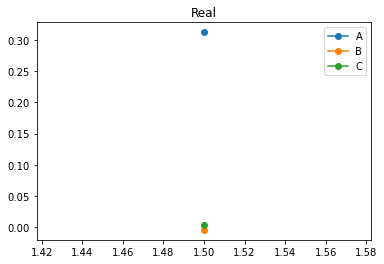

In [44]:
plt.figure()
plt.title('Real')
plt.plot(freq_mid,parameters_real[0],marker='o',label='A')
plt.plot(freq_mid,parameters_real[1],marker='o',label='B')
plt.plot(freq_mid,parameters_real[2],marker='o',label='C')
plt.legend()

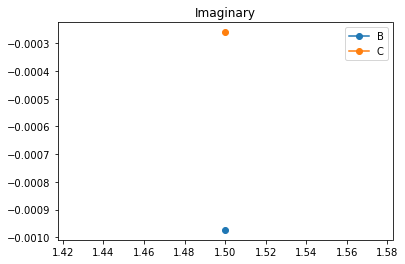

In [45]:
plt.figure()
plt.title('Imaginary')
plt.plot(freq_mid,parameters_imag[0],marker='o',label='B')
plt.plot(freq_mid,parameters_imag[1],marker='o',label='C')
plt.legend()

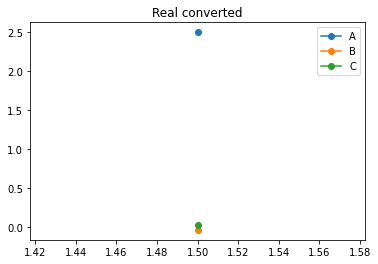

In [47]:
plt.figure()
plt.title('Real converted')
plt.plot(freq_mid,parameters_real[0]/norm_factor_real,marker='o',label='A')
plt.plot(freq_mid,parameters_real[1]/norm_factor_real,marker='o',label='B')
plt.plot(freq_mid,parameters_real[2]/norm_factor_real,marker='o',label='C')
plt.legend()

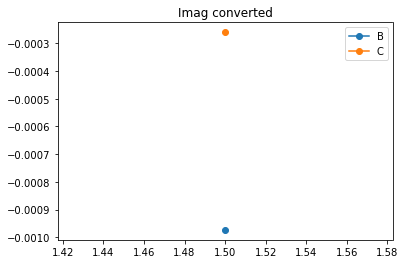

In [49]:
plt.figure()
plt.title('Imag converted')
plt.plot(freq_mid,parameters_imag[0],marker='o',label='B')
plt.plot(freq_mid,parameters_imag[1],marker='o',label='C')
plt.legend()

Now i do the same thing over a range of fourier frequencies!